# Guia Regresión Lineal

Este notebook presenta un tutorial completo sobre regresión lineal, basado en conceptos fundamentales de estadística y machine learning.

Creado por Borja Barber (Lead Instructor Data Science)

[tutorial regresion lineal explicada](https://numiqo.es/tutorial/linear-regression)

## Tabla de Contenidos
1. [Introducción a la Regresión Lineal](#introduccion)
2. [Tipos de Regresión Lineal](#tipos)
3. [Ecuación de Regresión](#ecuacion)
4. [Supuestos de la Regresión Lineal](#supuestos)
5. [Métricas de Evaluación](#metricas)
6. [Pruebas de Significancia](#significancia)
7. [Ejemplo Práctico](#ejemplo)
8. [Visualización](#visualizacion)
9. [Interpretación de Resultados](#interpretacion)
10. [Implementación en Python](#implementacion)

## 1. Introducción a la Regresión Lineal {#introduccion}

La **regresión lineal** es un método estadístico utilizado para modelar la relación entre una variable dependiente y una o más variables independientes. Es una de las técnicas más fundamentales en el análisis estadístico y machine learning.

### ¿Qué busca la regresión lineal?
- Establecer una relación lineal entre variables
- Predecir valores de la variable dependiente
- Entender el impacto de las variables independientes

In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
print("Librerías importadas correctamente")

Librerías importadas correctamente


## 2. Tipos de Regresión Lineal {#tipos}

### 2.1 Regresión Lineal Simple
- **Una variable independiente (x)**
- **Una variable dependiente (y)**
- Ejemplo: Predecir el peso basado en la altura

### 2.2 Regresión Lineal Múltiple
- **Múltiples variables independientes (x₁, x₂, ..., xₙ)**
- **Una variable dependiente (y)**
- Ejemplo: Predecir el peso basado en altura, edad y sexo

## 3. Ecuación de Regresión

### 3.1 Regresión Lineal Simple
La ecuación básica de la línea de regresión es:

**ŷ = a + bx**

Donde:
- **ŷ**: Valor estimado de y
- **a**: Intercepto en y (ordenada al origen)
- **b**: Pendiente de la línea
- **x**: Variable independiente

### 3.2 Regresión Lineal Múltiple
**ŷ = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ**

### 3.3 Interpretación de los Coeficientes
- **b > 0**: Correlación positiva
- **b < 0**: Correlación negativa
- **b = 0**: No hay correlación

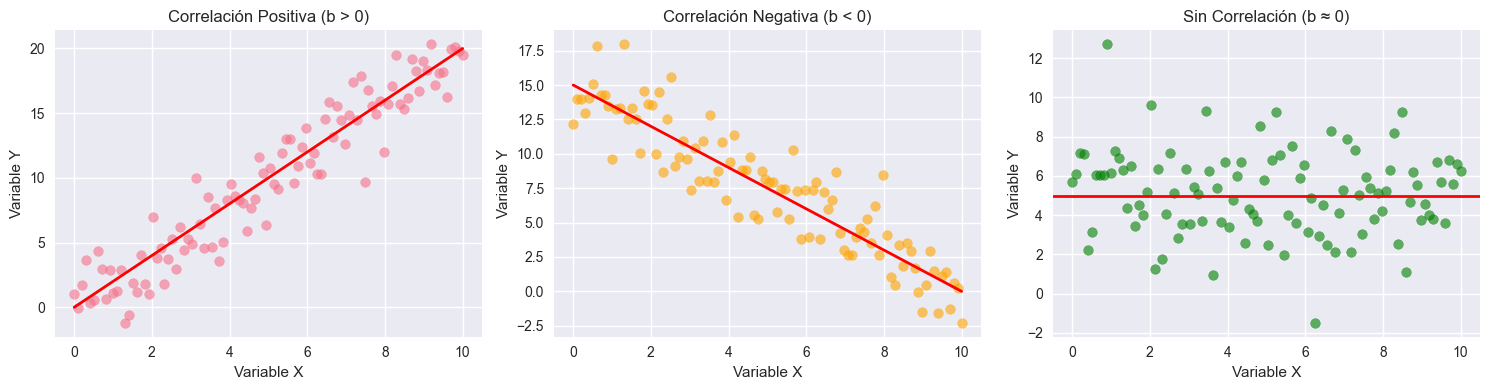

In [2]:
# Ejemplo visual de diferentes tipos de correlación
np.random.seed(42)
x = np.linspace(0, 10, 100)

# Correlación positiva
y_pos = 2 * x + np.random.normal(0, 2, 100)

# Correlación negativa
y_neg = -1.5 * x + 15 + np.random.normal(0, 2, 100)

# Sin correlación
y_none = np.random.normal(5, 2, 100)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Gráfico 1: Correlación positiva
axes[0].scatter(x, y_pos, alpha=0.6)
axes[0].plot(x, 2*x, color='red', linewidth=2)
axes[0].set_title('Correlación Positiva (b > 0)')
axes[0].set_xlabel('Variable X')
axes[0].set_ylabel('Variable Y')

# Gráfico 2: Correlación negativa
axes[1].scatter(x, y_neg, alpha=0.6, color='orange')
axes[1].plot(x, -1.5*x + 15, color='red', linewidth=2)
axes[1].set_title('Correlación Negativa (b < 0)')
axes[1].set_xlabel('Variable X')
axes[1].set_ylabel('Variable Y')

# Gráfico 3: Sin correlación
axes[2].scatter(x, y_none, alpha=0.6, color='green')
axes[2].axhline(y=5, color='red', linewidth=2)
axes[2].set_title('Sin Correlación (b ≈ 0)')
axes[2].set_xlabel('Variable X')
axes[2].set_ylabel('Variable Y')

plt.tight_layout()
plt.show()

## 4. Supuestos de la Regresión Lineal {#supuestos}

Para que un modelo de regresión lineal sea válido, debe cumplir varios supuestos:

### 4.1 Linealidad
La relación entre las variables independientes y dependiente debe ser lineal.

### 4.2 Homocedasticidad
La varianza de los errores debe ser constante para todos los valores de las variables independientes.

### 4.3 Distribución Normal de los Errores
Los residuos deben seguir una distribución normal.

### 4.4 No Multicolinealidad
Las variables independientes no deben estar altamente correlacionadas entre sí.

### 4.5 No Autocorrelación
Los errores no deben estar correlacionados entre observaciones sucesivas.

## 5. Métricas de Evaluación 

### 5.1 Coeficiente de Determinación (R²)
- Indica la proporción de varianza explicada por las variables independientes
- Rango: 0 a 1
- **R² más alto = mejor ajuste del modelo**

**Fórmula:** R² = 1 - (SSR / SST)

Donde:
- SSR: Suma de cuadrados de los residuos
- SST: Suma total de cuadrados

### 5.2 R² Ajustado
- Considera el número de variables independientes
- Previene el sobreajuste
- **Mejor para modelos con múltiples variables**

In [3]:
# Función para calcular R² ajustado
def adjusted_r2(r2, n, p):
    """
    Calcula el R² ajustado
    r2: R² del modelo
    n: número de observaciones
    p: número de variables independientes
    """
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Ejemplo de cálculo
r2_ejemplo = 0.85
n_observaciones = 100
p_variables = 3

r2_adj = adjusted_r2(r2_ejemplo, n_observaciones, p_variables)
print(f"R² original: {r2_ejemplo:.3f}")
print(f"R² ajustado: {r2_adj:.3f}")
print(f"Diferencia: {r2_ejemplo - r2_adj:.3f}")

R² original: 0.850
R² ajustado: 0.845
Diferencia: 0.005


## 6. Pruebas de Significancia {#significancia}

### 6.1 Prueba de Significancia del Modelo
- Utiliza el **estadístico F**
- Determina si R² difiere significativamente de cero
- **H₀**: R² = 0 (el modelo no es significativo)
- **H₁**: R² > 0 (el modelo es significativo)

### 6.2 Prueba de Significancia de Coeficientes
- Utiliza el **estadístico t**
- Verifica si los coeficientes individuales son significativos
- **H₀**: β = 0 (el coeficiente no es significativo)
- **H₁**: β ≠ 0 (el coeficiente es significativo)

### 6.3 Nivel de Significancia
- **p < 0.05**: Estadísticamente significativo
- **p < 0.01**: Altamente significativo
- **p < 0.001**: Muy altamente significativo

## 7. Ejemplo Práctico {#ejemplo}

### Predicción del Peso Corporal
Vamos a recrear el ejemplo mencionado en el tutorial: predecir el peso corporal usando:
- **Altura**
- **Edad**
- **Sexo**

**Ecuación del ejemplo:**
Peso = 47.379 + 0.297 × Altura - 24.41 × Edad + 8.922 × (es_hombre)

In [4]:
# Crear datos simulados basados en el ejemplo
np.random.seed(42)
n_samples = 200

# Generar variables independientes
altura = np.random.normal(170, 10, n_samples)  # cm
edad = np.random.randint(18, 65, n_samples)    # años
es_hombre = np.random.choice([0, 1], n_samples)  # 0=mujer, 1=hombre

# Generar peso basado en la ecuación del ejemplo (con algo de ruido)
peso = (47.379 + 0.297 * altura - 0.241 * edad + 8.922 * es_hombre + 
        np.random.normal(0, 5, n_samples))  # kg

# Crear DataFrame
datos = pd.DataFrame({
    'altura': altura,
    'edad': edad,
    'es_hombre': es_hombre,
    'peso': peso
})

print("Datos simulados creados:")
print(datos.head())
print(f"\nForma del dataset: {datos.shape}")
print("\nEstadísticas descriptivas:")
print(datos.describe())

Datos simulados creados:
       altura  edad  es_hombre        peso
0  174.967142    19          1  107.397056
1  168.617357    43          0   94.478648
2  176.476885    34          0   95.099850
3  185.230299    57          1   96.915901
4  167.658466    50          1   93.677509

Forma del dataset: (200, 4)

Estadísticas descriptivas:
           altura        edad   es_hombre        peso
count  200.000000  200.000000  200.000000  200.000000
mean   169.592290   41.500000    0.480000   91.878188
std      9.310039   12.894235    0.500854    8.285548
min    143.802549   18.000000    0.000000   70.150160
25%    162.948723   30.000000    0.000000   86.426396
50%    169.958081   42.000000    0.000000   92.019229
75%    175.008525   52.000000    1.000000   96.592412
max    197.201692   64.000000    1.000000  119.744237


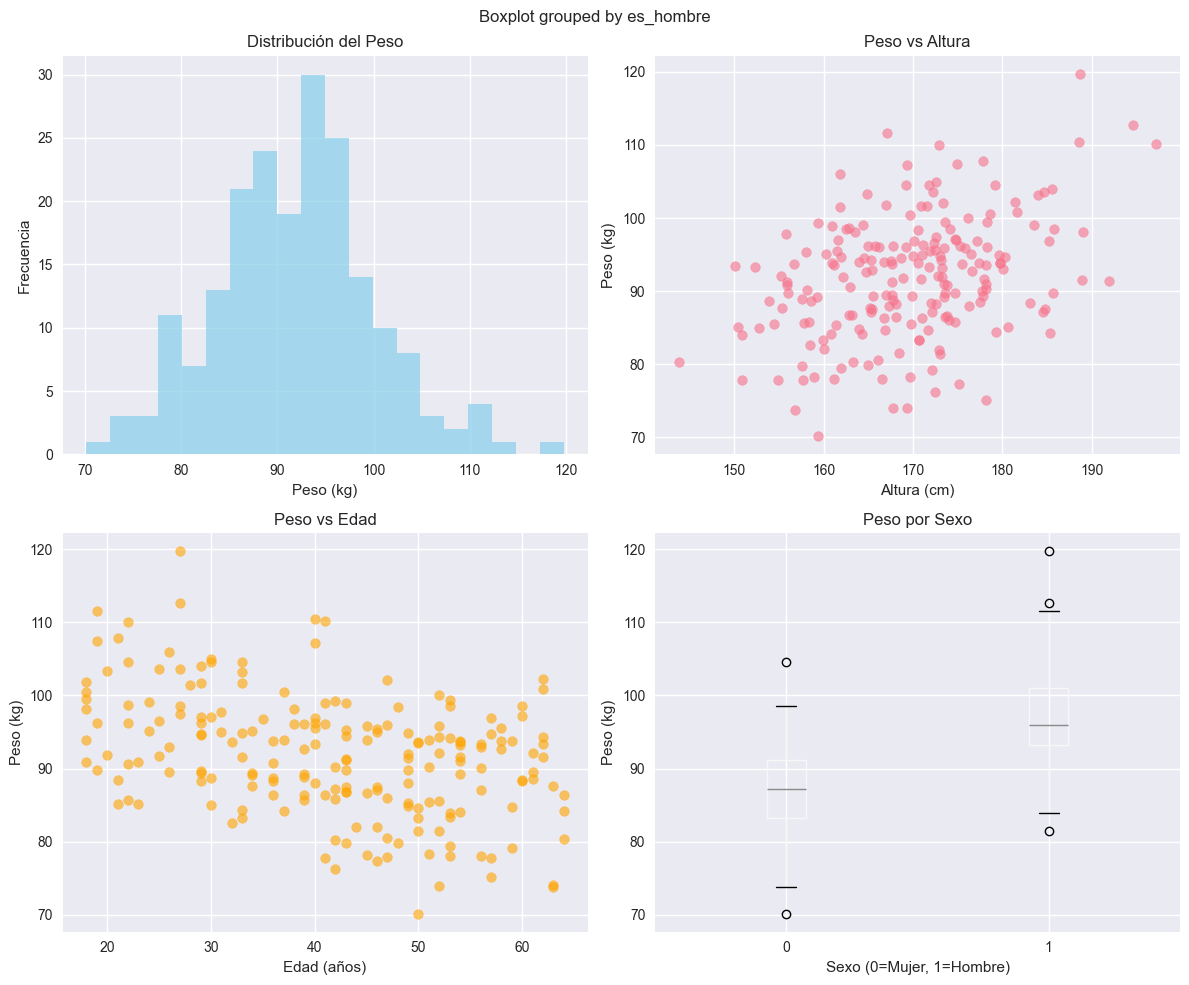

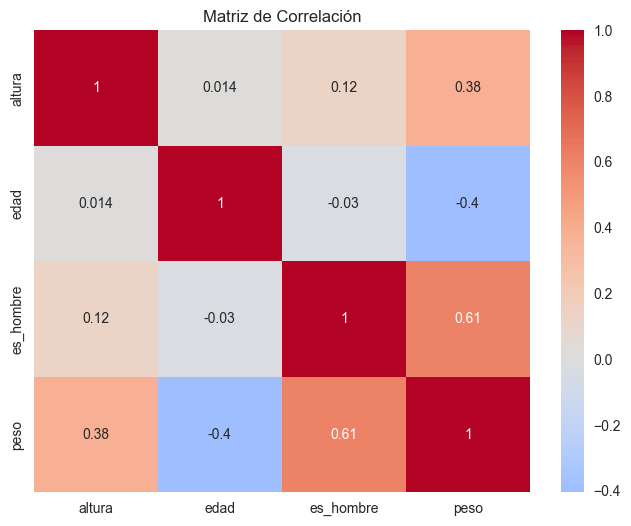

In [5]:
# Análisis exploratorio de datos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Distribución del peso
axes[0, 0].hist(datos['peso'], bins=20, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Distribución del Peso')
axes[0, 0].set_xlabel('Peso (kg)')
axes[0, 0].set_ylabel('Frecuencia')

# Peso vs Altura
axes[0, 1].scatter(datos['altura'], datos['peso'], alpha=0.6)
axes[0, 1].set_title('Peso vs Altura')
axes[0, 1].set_xlabel('Altura (cm)')
axes[0, 1].set_ylabel('Peso (kg)')

# Peso vs Edad
axes[1, 0].scatter(datos['edad'], datos['peso'], alpha=0.6, color='orange')
axes[1, 0].set_title('Peso vs Edad')
axes[1, 0].set_xlabel('Edad (años)')
axes[1, 0].set_ylabel('Peso (kg)')

# Peso por Sexo
datos.boxplot(column='peso', by='es_hombre', ax=axes[1, 1])
axes[1, 1].set_title('Peso por Sexo')
axes[1, 1].set_xlabel('Sexo (0=Mujer, 1=Hombre)')
axes[1, 1].set_ylabel('Peso (kg)')

plt.tight_layout()
plt.show()

# Matriz de correlación
plt.figure(figsize=(8, 6))
correlation_matrix = datos.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

In [6]:
# Implementar regresión lineal múltiple
X = datos[['altura', 'edad', 'es_hombre']]
y = datos['peso']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

# Calcular métricas
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("=== RESULTADOS DEL MODELO ===")
print(f"R² (entrenamiento): {r2_train:.4f}")
print(f"R² (prueba): {r2_test:.4f}")
print(f"MSE (entrenamiento): {mse_train:.4f}")
print(f"MSE (prueba): {mse_test:.4f}")
print(f"RMSE (prueba): {np.sqrt(mse_test):.4f}")

print("\n=== COEFICIENTES DEL MODELO ===")
print(f"Intercepto: {modelo.intercept_:.3f}")
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo.coef_
})
print(coeficientes)

print("\n=== ECUACIÓN DE REGRESIÓN ===")
print(f"Peso = {modelo.intercept_:.3f} + {modelo.coef_[0]:.3f} × Altura + {modelo.coef_[1]:.3f} × Edad + {modelo.coef_[2]:.3f} × EsHombre")

=== RESULTADOS DEL MODELO ===
R² (entrenamiento): 0.6335
R² (prueba): 0.5495
MSE (entrenamiento): 26.5243
MSE (prueba): 23.4002
RMSE (prueba): 4.8374

=== COEFICIENTES DEL MODELO ===
Intercepto: 48.215
    Variable  Coeficiente
0     altura     0.294295
1       edad    -0.254941
2  es_hombre     9.321061

=== ECUACIÓN DE REGRESIÓN ===
Peso = 48.215 + 0.294 × Altura + -0.255 × Edad + 9.321 × EsHombre


## 8. Visualización 

### 8.1 Gráficos de Dispersión
Muestran la relación entre variables

### 8.2 Gráficos de Residuos
Verifican los supuestos del modelo

### 8.3 Gráficos Q-Q
Verifican la normalidad de los residuos

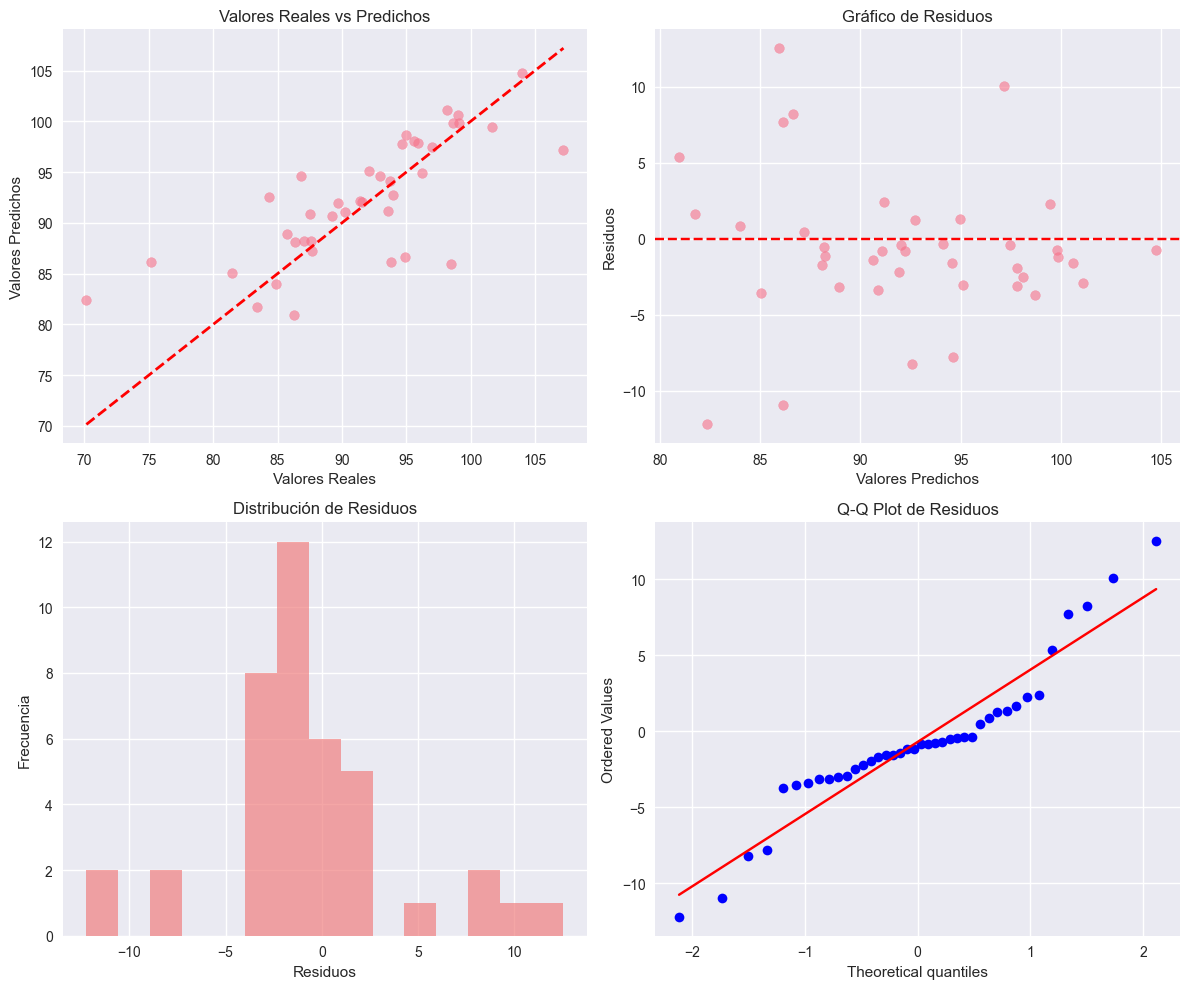


Prueba de Shapiro-Wilk para normalidad de residuos:
Estadístico: 0.9156
Valor p: 0.0056
Los residuos NO siguen una distribución normal (p ≤ 0.05)


In [7]:
# Análisis de residuos
residuos = y_test - y_pred_test

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Valores reales vs predichos
axes[0, 0].scatter(y_test, y_pred_test, alpha=0.6)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Valores Reales')
axes[0, 0].set_ylabel('Valores Predichos')
axes[0, 0].set_title('Valores Reales vs Predichos')

# 2. Gráfico de residuos
axes[0, 1].scatter(y_pred_test, residuos, alpha=0.6)
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Valores Predichos')
axes[0, 1].set_ylabel('Residuos')
axes[0, 1].set_title('Gráfico de Residuos')

# 3. Histograma de residuos
axes[1, 0].hist(residuos, bins=15, alpha=0.7, color='lightcoral')
axes[1, 0].set_xlabel('Residuos')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Distribución de Residuos')

# 4. Q-Q plot para normalidad
stats.probplot(residuos, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos')

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos
shapiro_stat, shapiro_p = stats.shapiro(residuos)
print(f"\nPrueba de Shapiro-Wilk para normalidad de residuos:")
print(f"Estadístico: {shapiro_stat:.4f}")
print(f"Valor p: {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("Los residuos siguen una distribución normal (p > 0.05)")
else:
    print("Los residuos NO siguen una distribución normal (p ≤ 0.05)")

## 9. Interpretación de Resultados {#interpretacion}

### 9.1 Interpretación de Coeficientes
- **Coeficientes estandarizados (Beta)** ayudan a comparar la contribución de variables
- **Valores p < 0.05** indican predictores significativos
- **Interpretar en el contexto** de la pregunta de investigación

### 9.2 Evaluación del Modelo
- **R² alto**: Buen ajuste del modelo
- **Residuos normales**: Modelo válido
- **Sin patrones en residuos**: Supuestos cumplidos

In [8]:
# Cálculo de coeficientes estandarizados (Beta)
from sklearn.preprocessing import StandardScaler

# Estandarizar variables
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X_train)
y_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Modelo con variables estandarizadas
modelo_std = LinearRegression()
modelo_std.fit(X_scaled, y_scaled)

# Crear tabla de resultados
resultados = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente_Original': modelo.coef_,
    'Coeficiente_Estandarizado': modelo_std.coef_
})

print("=== COMPARACIÓN DE COEFICIENTES ===")
print(resultados)

print("\n=== INTERPRETACIÓN ===")
print("1. ALTURA:")
print(f"   - Por cada cm adicional de altura, el peso aumenta {modelo.coef_[0]:.3f} kg")
print(f"   - Importancia relativa: {abs(modelo_std.coef_[0]):.3f}")

print("\n2. EDAD:")
print(f"   - Por cada año adicional de edad, el peso cambia {modelo.coef_[1]:.3f} kg")
print(f"   - Importancia relativa: {abs(modelo_std.coef_[1]):.3f}")

print("\n3. SEXO (Es Hombre):")
print(f"   - Los hombres pesan en promedio {modelo.coef_[2]:.3f} kg más que las mujeres")
print(f"   - Importancia relativa: {abs(modelo_std.coef_[2]):.3f}")

# Encontrar la variable más importante
var_mas_importante = resultados.loc[abs(resultados['Coeficiente_Estandarizado']).idxmax(), 'Variable']
print(f"\nVARIABLE MÁS IMPORTANTE: {var_mas_importante}")

=== COMPARACIÓN DE COEFICIENTES ===
    Variable  Coeficiente_Original  Coeficiente_Estandarizado
0     altura              0.294295                   0.325099
1       edad             -0.254941                  -0.385116
2  es_hombre              9.321061                   0.547173

=== INTERPRETACIÓN ===
1. ALTURA:
   - Por cada cm adicional de altura, el peso aumenta 0.294 kg
   - Importancia relativa: 0.325

2. EDAD:
   - Por cada año adicional de edad, el peso cambia -0.255 kg
   - Importancia relativa: 0.385

3. SEXO (Es Hombre):
   - Los hombres pesan en promedio 9.321 kg más que las mujeres
   - Importancia relativa: 0.547

VARIABLE MÁS IMPORTANTE: es_hombre


## 10. Implementación en Python {#implementacion}

### 10.1 Herramientas Recomendadas
- **scikit-learn**: Implementación simple y eficiente
- **pandas**: Manipulación de datos
- **matplotlib/seaborn**: Visualización



## Conclusiones

### Resumen de Conceptos Clave

1. **La regresión lineal** es una técnica fundamental para modelar relaciones lineales entre variables

2. **Los supuestos** deben verificarse para garantizar la validez del modelo:
   - Linealidad
   - Homocedasticidad
   - Normalidad de residuos
   - No multicolinealidad
   - No autocorrelación

3. **Las métricas de evaluación** ayudan a determinar la calidad del modelo:
   - R²: Proporción de varianza explicada
   - R² ajustado: Considera el número de variables
   - Pruebas de significancia: F-test y t-test

4. **La interpretación** debe considerar:
   - Magnitud y signo de los coeficientes
   - Significancia estadística
   - Coeficientes estandarizados para comparar importancia
   - Contexto del problema

5. **Python ofrece herramientas poderosas**:
   - scikit-learn: Implementación eficiente
   - statsmodels: Análisis estadístico completo
   - Visualización: matplotlib y seaborn

